In [2]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv(f"cleaned_data.csv")
df = data.copy()
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


## How does screen time affect the amount and quality of sleep?

In this section we'll analyse what, if any, effect does screen time have on the amount and quality of sleep an individual gets.

The first section to answer this question will explore the data numerically and visually to find trends in the recorded screen time, sleep quality and sleep amount across the data set.

In [4]:
display(df.groupby("sleep_quality_1_5")["screen_time_hours"].count())

sleep_quality_1_5
1    275
2     94
3     28
4      3
Name: screen_time_hours, dtype: int64

Out of the 400 entries in the dataset, 275 individuals recorded their sleep quality as 1, the lowest possible value. 94 people reported a 2, 28 reported a 3, and only 3 people classified their sleep quality as a 4. No entry had the highest possible value, 5, in this column.

In [5]:
display(df.groupby("sleep_quality_1_5")["screen_time_hours"].mean())

sleep_quality_1_5
1    9.484727
2    8.181596
3    7.584643
4    6.740000
Name: screen_time_hours, dtype: float64

The average screen time reported by individuals with the self-reported worst sleep quality is 9.48 hours, followed by 8.18 hours by individuals who reported a 2 in sleep quality. The downward trend continues on with the people with a 3 in sleep quality spending an average of 7.58 hours in front of screens and the individuals with a sleep quality of 4 having an mean screen time of 6.74.

In [6]:
display(df.groupby("sleep_quality_1_5")["work_screen_hours"].mean())

sleep_quality_1_5
1    2.297309
2    2.009255
3    1.795000
4    0.780000
Name: work_screen_hours, dtype: float64

Comparing the average work screen hours of the individuals to their reported sleep quality shows a similar trend as overall screen hours: the better the reported sleep quality is, the less work screen time was recorded. At the worst sleep quality, an average of 2.3 hours of work screen hours was recorded, while at sleep quality 4 this average drops to 0.78 hours.

In [7]:
display(df.groupby("sleep_quality_1_5")["leisure_screen_hours"].mean())

sleep_quality_1_5
1    7.187418
2    6.172340
3    5.789643
4    5.960000
Name: leisure_screen_hours, dtype: float64

The trends in the sleep quality compared to average leisure screen hours maintain a mostly similar trend, though in this comparison the people reporting a sleep quality of 3 spend slightly less time with their screens for leisure than those who reported a 4, 5.79 hours to 5.96 hours. On the other end, the worst sleepers recorded an average of 7.19 leisure screen hours.

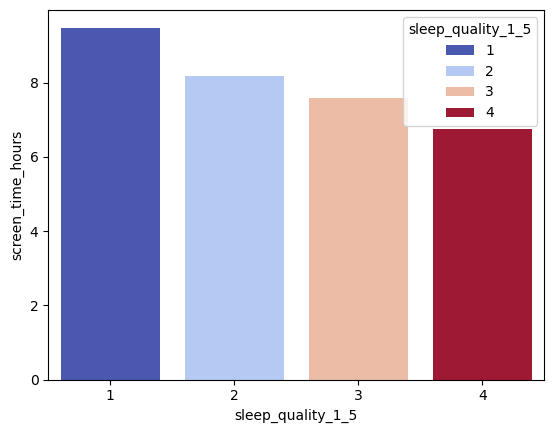

In [37]:
sns.barplot(data=df, y="screen_time_hours", x="sleep_quality_1_5", errorbar=None, palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The barplot above illustrates the trend of decreasing screen time correlating to improved sleep quality, that the numerical analysis above already suggested.

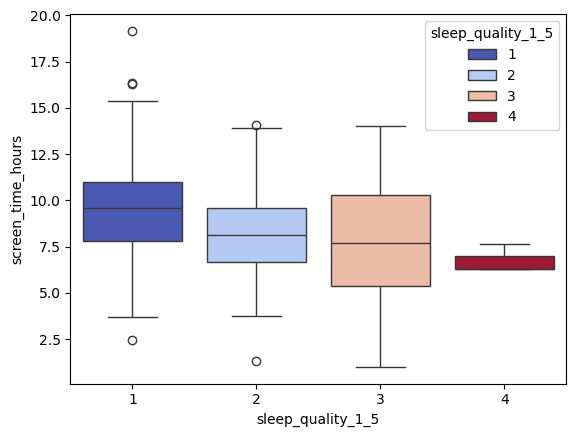

In [ ]:
sns.boxplot(data=df, y="screen_time_hours", x="sleep_quality_1_5", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The boxplot continues to show the same trend in the correlation of sleep quality and screen time. It also illustrates the wide range of values in the recorded screen time, especially in entries with a lower sleep quality. The variance in sleep quality 4 is very small, and the category has no outliers, with the interquantile range in the other three recorded sleep quality categories is much wider, with some exceptions recorded at sleep qualities 1 and 2, to both directions.

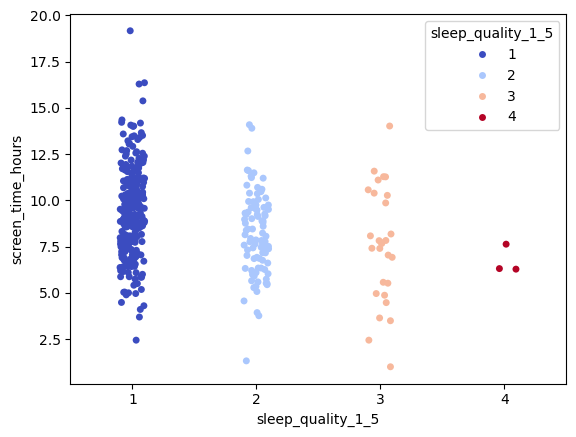

In [42]:
sns.stripplot(data=df,  y="screen_time_hours", x="sleep_quality_1_5",  palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The strip plot illustrates the much denser occurence of lower sleep qualities, but also that amongst sleep quality categories 1 to 3 the spread of the screen time values is quite wide. The three entries with a recorded sleep quality of four are comparatively closely grouped together.

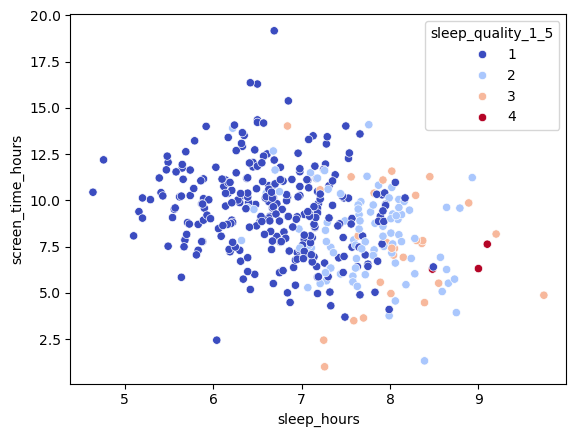

In [11]:
sns.scatterplot(data=df, y="screen_time_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

This scatter plot adds the recorded number of sleep hours into the analysis. This plot illustrates that the amount of sleep may have a larger impact on the quality of sleep recorded, instead of the number of screen hours. The further right on the x-axis we move on the plot, the more higher sleep quality recordings appear, while on the left there are only sleep quality 1s recorded. The first 2s appear between 6 and 7 hours of sleep and the higher values appear more frequently and the 1s appear less frequently as the sleep hours increase. 

### Mathematical correlations

This section will analyse the mathematical correlations between the key variables: screen time, sleep quality and amount of sleep.

In [17]:
# Pearson correlation coefficient

pearson = round(float(df["screen_time_hours"].corr(df["sleep_hours"], method="pearson")), 2)
pearson

-0.33

In [18]:
round(float(df["screen_time_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.28

In [19]:
round(float(df["sleep_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

0.61

The Pearson correlation coefficients show that there is a weak negative correlation between screen time hours and sleep hours, as well as between screen time and sleep quality. There is, however, a much stronger positive linear correlation between the recorded number of sleep hours and sleep quality.

In [20]:
# Spearman correlation coefficient

spearman = round(float(df["screen_time_hours"].corr(df["sleep_hours"], method="spearman")), 2)
spearman

-0.34

In [21]:
round(float(df["screen_time_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.27

In [22]:
round(float(df["sleep_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

0.63

The Spearman correlation coefficients have similar trends as the Pearson correlations: there is a weak, negative monotonic correlation between screen time and sleep hours, and screen time and sleep quality. Here too there is a much stronger positive monotonous correlation between sleep quality and the amount of sleep.

## Types of screen hours: Work vs. Leisure

This section will look further into what trends emerge, if any, when the screen time is split to work time and leisure time.

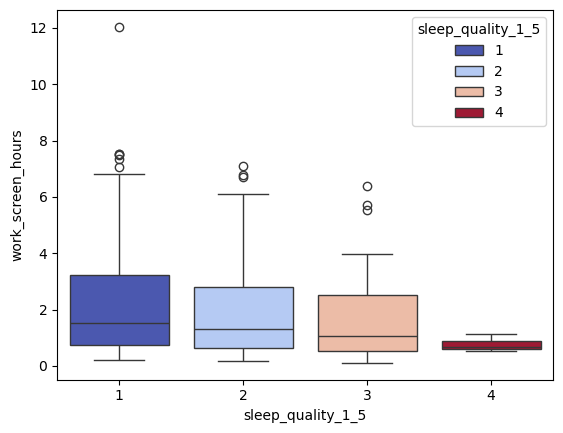

In [ ]:
sns.boxplot(data=df, x="sleep_quality_1_5", y="work_screen_hours", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The trend between work screen time and sleep quality mimics the trend between sleep quality and general screen time, though it does not present the trend as strongly: less work screen hours corresponds to a higher sleep quality. In general, there is a smaller amount of variation between the work screen times recorded, bringing the categories closer together. The median amount of work screen time across all sleep quality categories recorded is within a span of an hour, unlike in the general screen time categories where the median values spanned a much larger range. The same is also true for the range of values, where the analysed maximum value here is around 12 hours of work screen time, compared to the maximum of nearly 20 hours of general screen time.

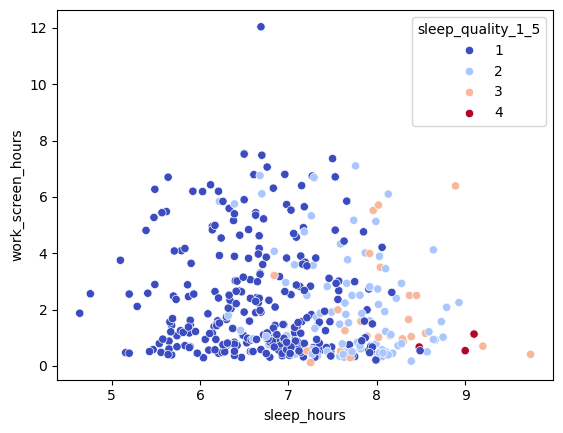

In [23]:
sns.scatterplot(data=df, y="work_screen_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

The scatter plot also shows similar trends to the general screen time trends: the sleep quality appears to still be more affected by the amount of sleep rather than the work screen time.

In [27]:
round(float(df["work_screen_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.1

In [28]:
round(float(df["work_screen_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.1

For the mathematical correlations, both the Pearson and Spearman correlation coefficients are even smaller than the those for general screen time. Both measuring at -0.1 suggest negligible linear and monotonous correlation between work screen hours and the quality of sleep.

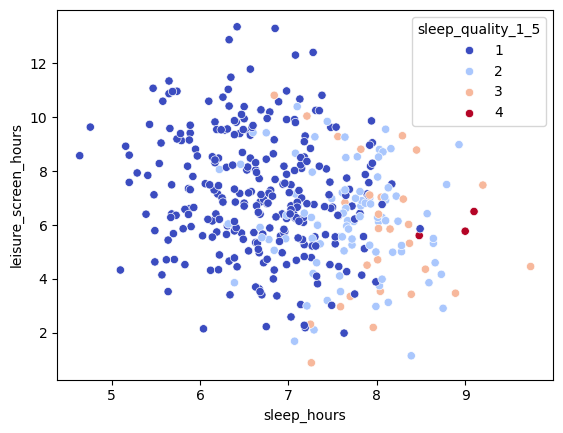

In [24]:
sns.scatterplot(data=df, y="leisure_screen_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

The trend of the amound of sleep having more effect on the quality of sleep holds fast when analysing how the leisure screen time affects the amount and quality of sleep. Again there is little change in sleep quality across the change in leisure screen time, but rather a change is observed as the amount of sleep increases.

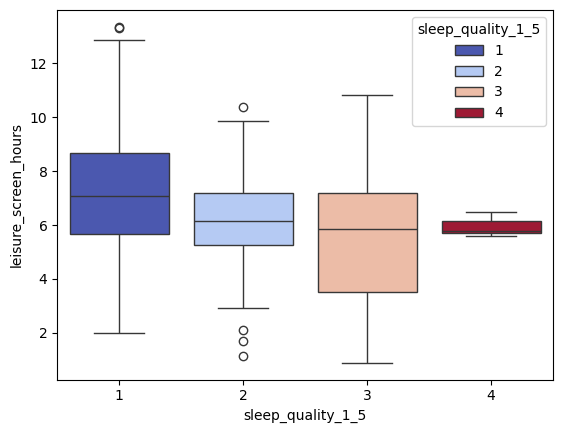

In [39]:
sns.boxplot(data=df, x="sleep_quality_1_5", y="leisure_screen_hours", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The boxplot sleep quality in terms of leisure screen time show a close set of median values across all four sleep quality categories, and the median values across sleep qualities 2 to 4 are very close to each other. The variation in values across categories 1 to 3 is however still very vast.

In [29]:
round(float(df["leisure_screen_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.22

In [30]:
round(float(df["leisure_screen_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.22

The mathematical correlations between leisure screen hours and sleep quality are sligthly stronger than those for work screen hours. At -0.22 coefficients in both Pearson and Spearman calculations, we can observe very weak negative correlations betweeen leisure screen time and sleep quality.

## Does Exercise or Social Time in a Week impact sleep quality in relation to screen time?

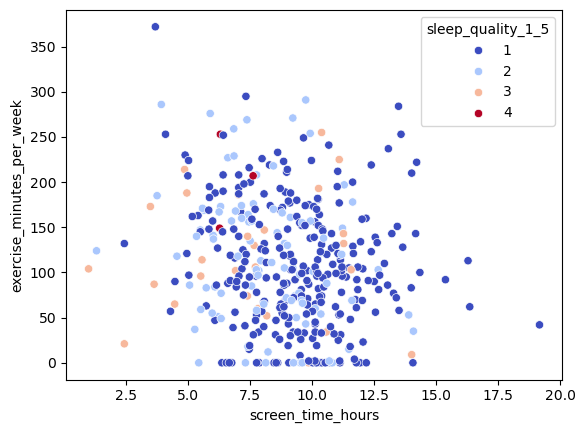

In [31]:
sns.scatterplot(data=df, x="screen_time_hours", y="exercise_minutes_per_week", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

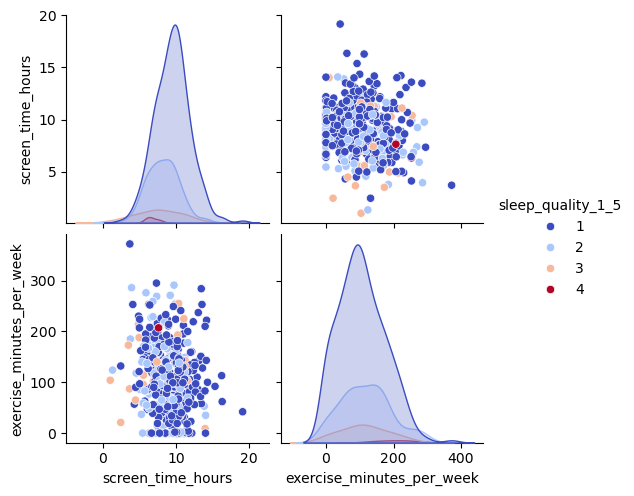

In [46]:
sns.pairplot(data=df, vars=["screen_time_hours", "exercise_minutes_per_week"], hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

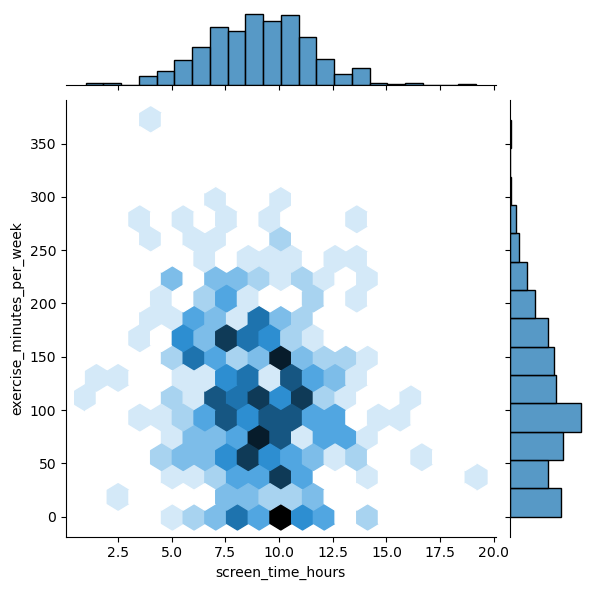

In [48]:
sns.jointplot(data=df, x='screen_time_hours', y='exercise_minutes_per_week', kind='hex')
plt.show()

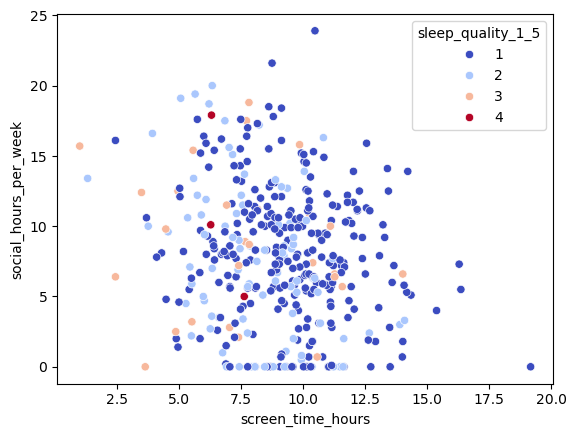

In [32]:
sns.scatterplot(data=df, x="screen_time_hours", y="social_hours_per_week", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()